This code aims to replicate the following figures: http://user.astro.columbia.edu/~kvj/research/archaeology.html

In [1]:
import sys
sys.path.append('../mock')
import allvariables
import os
import vaex
import pynbody
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Get the parameters from the config file
params = allvariables.getparamsnotebook()

# Define parameter names
param_names = [
        "snap", "sim", "sim_dir", "sat_id_dir", "rmin", "rmax", "sat_mask", "ananke_name", 
        "photo_sys", "cmd_magnames", "app_mag_lim_lo", "app_mag_lim_hi", 
        "abs_mag_lim_lo", "abs_mag_lim_hi", "ananke_r_max", "fsample"
]

# Initialize parameter dictionary
params_dict = {}

# Assign values to parameters and declare them locally
for param_name, param_value in zip(param_names, params):
    params_dict[param_name] = param_value
    locals()[param_name] = param_value

In [3]:
# Get the current working directory
current_dir = os.getcwd()

# Go back one directory (to 'src') and then to 'mock'
ananke_file_path = os.path.join(current_dir, "..", "mock", "survey.m12b_385_extended.h5")
print(f"\nOpening data from: \n{ananke_file_path}")

# Check if the file exists
if os.path.exists(ananke_file_path):
    # Proceed with opening the file
    survey = vaex.open(ananke_file_path)
else:
    print(f"{ananke_file_path} file does not exist.")


Opening data from: 
/home/jovyan/home/rubin_mw_mocks/src/visualization/../mock/survey.m12b_385_extended.h5


In [4]:
column_names = survey.column_names
print(column_names)

['age', 'alpha', 'calcium', 'carbon', 'dec', 'dform', 'dmod', 'feh', 'glat', 'glon', 'grav', 'helium', 'lsst_gmag', 'lsst_gmag_Err', 'lsst_gmag_Intrinsic', 'lsst_gmag_Sig', 'lsst_imag', 'lsst_imag_Err', 'lsst_imag_Intrinsic', 'lsst_imag_Sig', 'lsst_rmag', 'lsst_rmag_Err', 'lsst_rmag_Intrinsic', 'lsst_rmag_Sig', 'lsst_umag', 'lsst_umag_Err', 'lsst_umag_Intrinsic', 'lsst_umag_Sig', 'lsst_ymag', 'lsst_ymag_Err', 'lsst_ymag_Intrinsic', 'lsst_ymag_Sig', 'lsst_zmag', 'lsst_zmag_Err', 'lsst_zmag_Intrinsic', 'lsst_zmag_Sig', 'lum', 'mact', 'magnesium', 'mtip', 'mub', 'mudec', 'mul', 'mura', 'neon', 'nitrogen', 'oxygen', 'parentid', 'partid', 'pi', 'px', 'py', 'pz', 'ra', 'rad', 'silicon', 'smass', 'sulphur', 'teff', 'vr', 'vx', 'vy', 'vz']


In [5]:
px = survey.px.to_numpy()
py = survey.py.to_numpy()
pz = survey.pz.to_numpy()

In [6]:
# Extract pos and vel
anankePos = np.stack((survey.px.to_numpy(), survey.py.to_numpy(), survey.pz.to_numpy())).T
anankeVel = np.stack((survey.vx.to_numpy(), survey.vy.to_numpy(), survey.vz.to_numpy())).T

In [7]:
# Extract apparent magnitudes
app_g_mag = survey.lsst_gmag.to_numpy()
app_r_mag = survey.lsst_rmag.to_numpy()
app_i_mag = survey.lsst_imag.to_numpy()
app_u_mag = survey.lsst_umag.to_numpy()
app_y_mag = survey.lsst_ymag.to_numpy()
app_z_mag = survey.lsst_zmag.to_numpy()

In [8]:
num_particles = len(anankePos) 
print(num_particles)

13806724


In [9]:
# Create a pynbody snapshot
snap = pynbody.new(gas=num_particles)  # Create an empty snapshot with 'num_particles' gas particles
snap['pos'] = anankePos                       # Assign positions
snap['vel'] = anankeVel                       # Assign velocities
snap['mag'] = app_g_mag                       # Assign magnitude

In [10]:
# Check data range
print("Magnitude Range:", np.min(app_g_mag), np.max(app_g_mag))

Magnitude Range: -3.4912236 32.266342


In [11]:
# # Create a pynbody plot
# plt.figure()
# img = pynbody.plot.sph.image(snap, qty='mag', width=50, cmap='viridis', av_z=True)

# # Customize color bar label
# cbar = plt.colorbar(img)
# cbar.set_label('Surface Brightness (mag/arcsec$^2$)')

# # Show the plot
# plt.show()

In [12]:
# # Create a pynbody plot
# plt.figure()
# img = pynbody.plot.sph.image(snap, qty='mag', width=50, cmap='viridis', av_z=True, vmin=np.min(app_g_mag), vmax=np.max(app_g_mag))

# # Customize color bar label
# cbar = plt.colorbar(img)
# cbar.set_label('Surface Brightness (mag/arcsec$^2$)')

# # Show the plot
# plt.show()

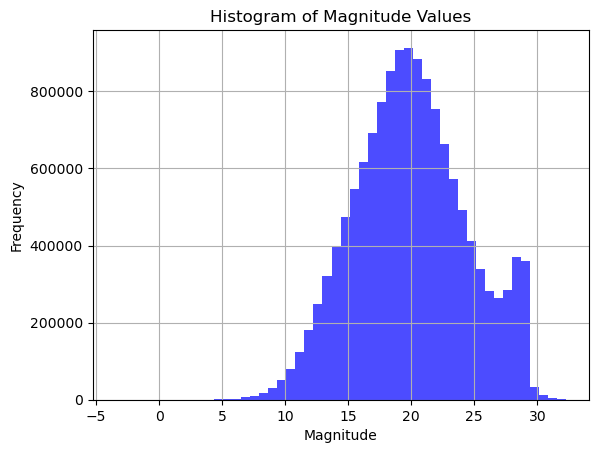

In [13]:
import matplotlib.pyplot as plt

# Plot the magnitude data directly
plt.figure()
plt.hist(app_g_mag, bins=50, color='blue', alpha=0.7)
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Histogram of Magnitude Values')
plt.grid(True)
plt.show()

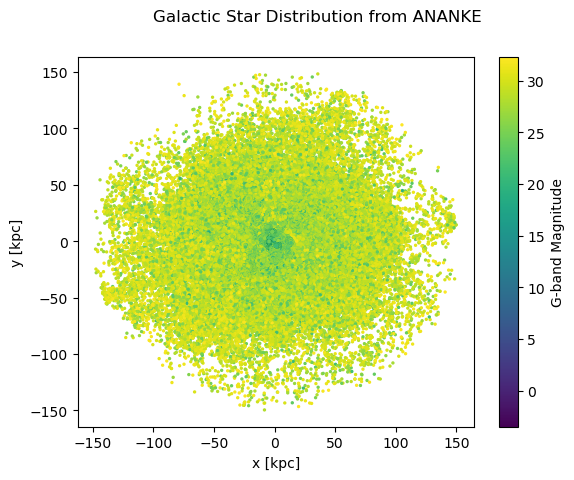

In [14]:
# Create the figure
fig = plt.figure()
ax = plt.gca()

# Create scatter plot with magnitude values
sc = ax.scatter(px , py, c=app_g_mag, cmap='viridis', s=2)
ax.set_xlabel(r'x [kpc]')
ax.set_ylabel(r'y [kpc]')
fig.suptitle("Galactic Star Distribution from ANANKE")

# Add color bar
cbar = plt.colorbar(sc)
cbar.set_label('G-band Magnitude')

plt.show()

In [53]:
import matplotlib
import matplotlib.pyplot as plt

def plotDistribution(magnitudeArray, colorbarLabel):
    """
    Plots the stellar distribution from ananke, using the magnitudes as weights

    Parameters:
    -----------
    magnitudeArray : numpy.ndarray
        Array of apparent magnitudes.
    colorbarLabel : string
        Label to use for the colorbar. 

    Returns:
    --------
    """

    # Create the figure
    fig = plt.figure()
    ax = plt.gca()

    # Use 2-D histogram with magnitude as weights
    counts, xedges, yedges, im = ax.hist2d(
        px,
        py,
        bins=200,
        norm=matplotlib.colors.LogNorm(),
        weights=magnitudeArray,
        cmap='viridis'
    )

    # Add labels, aspect ratio, and title
    ax.set_xlabel(r'x [kpc]')
    ax.set_ylabel(r'y [kpc]')
    ax.set_aspect('equal')
    fig.suptitle("Galactic Star Distribution from ANANKE")

    # Add color bar
    cbar = plt.colorbar(im)
    cbar.set_label(colorbarLabel)

    plt.show()

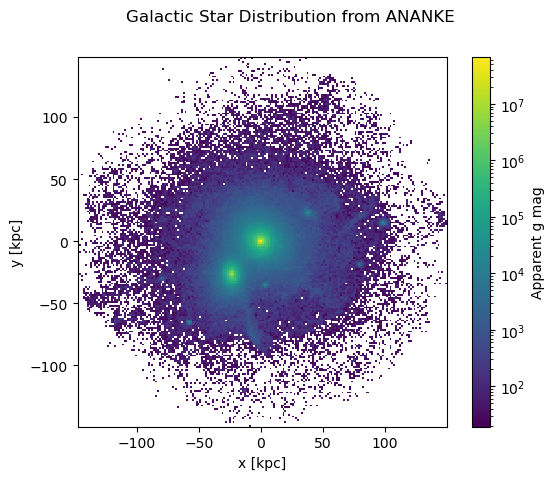

In [54]:
plotDistribution(app_g_mag, "Apparent g mag")

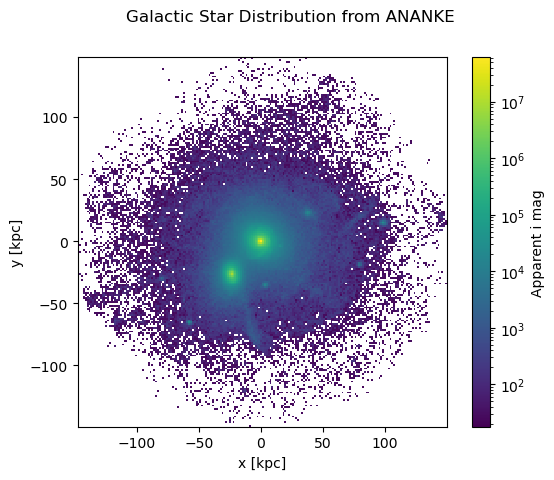

In [24]:
plotDistribution(app_i_mag, "Apparent i mag")

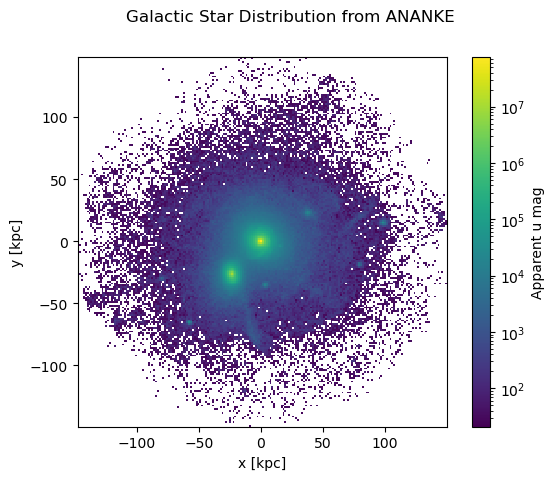

In [25]:
plotDistribution(app_u_mag, "Apparent u mag")

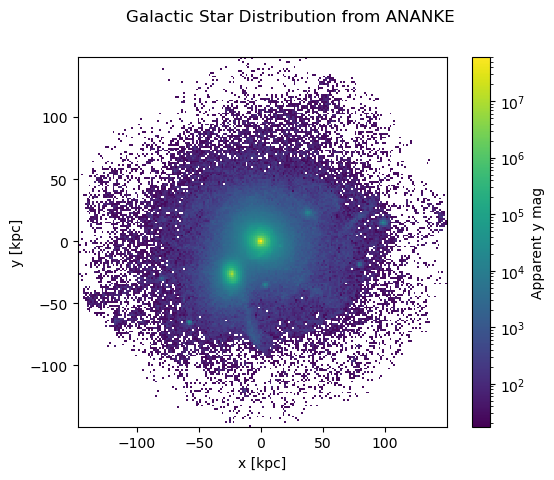

In [26]:
plotDistribution(app_y_mag, "Apparent y mag")

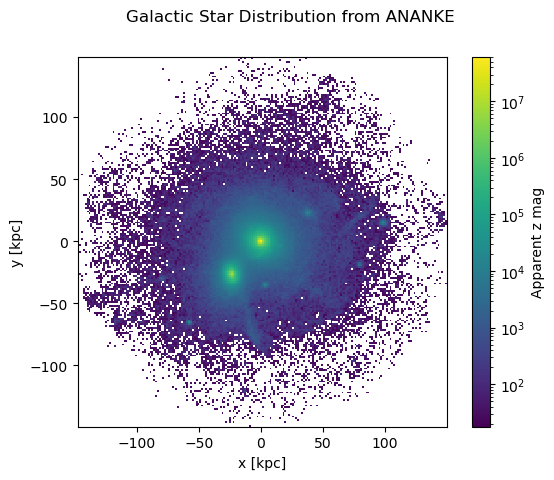

In [27]:
plotDistribution(app_z_mag, "Apparent z mag")